### 21.06.23  한경아카데미_서현진

# 유방암 데이터
- 10, 5, 2 차원으로 차원 축소
- 원본과 차원축소한 데이터의 분류 정확도 측정
- 2차원으로 축소한 것은 시각화나타내기
- 군집화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [4]:
# 스케일링_정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bc_std = scaler.fit_transform(breast_cancer.data)

##  차원축소

In [21]:
# 차원축소
from sklearn.decomposition import PCA
# 차원지정
pca_2 = PCA(n_components=2)
pca_5 = PCA(n_components=5)
pca_10 = PCA(n_components=10)

# 학습데이터 변환 : 정규화한 데이터 차원 축소
bc_pca_2 = pca_2.fit_transform(bc_std) # (569, 30) -> (569, 2) 
bc_pca_5 = pca_5.fit_transform(bc_std) # (569, 30) -> (569, 5) 
bc_pca_10 = pca_10.fit_transform(bc_std) # (569, 30) -> (569, 10) 

#데이터 프레임 만들기
bc_df_2 = pd.DataFrame(bc_pca_2, columns= ['PC1','PC2'] )
bc_df_5 = pd.DataFrame(bc_pca_5, columns= ['PC1','PC2','PC3','PC4','PC5'] )
bc_df_10 = pd.DataFrame(bc_pca_10, columns= ['PC1','PC2','PC3','PC4','PC5',
                                            'PC6','PC7','PC8','PC9','PC10'] )

# 타겟추가
bc_df_2['target'] = breast_cancer.target
bc_df_5['target'] = breast_cancer.target
bc_df_10['target'] = breast_cancer.target


In [22]:
bc_df_2.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [23]:
bc_df_5.head()

,PC1,PC2,PC3,PC4,PC5,target
0,9.192837,1.948583,-1.123166,3.633729,-1.195117,0
1,2.387802,-3.768172,-0.529293,1.118265,0.621777,0
2,5.733896,-1.075174,-0.551748,0.912084,-0.177082,0
3,7.122953,10.275589,-3.232789,0.152546,-2.960881,0
4,3.935302,-1.948072,1.389767,2.940640,0.546751,0


In [24]:
bc_df_10.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398403,-0.157114,-0.877381,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013357,0.240988,-0.711904,1.106994,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024068,0.454284,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429910,1.059564,-1.405439,-1.116977,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636375,-0.263808,0.377694,0


##  원본 VS 차원축소한 데이터 _ 분류 정확도 측정

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### -원본 데이터로 분류

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)

In [29]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9090909090909091

### - PCA 데이터로 분류

In [73]:
# 2차원
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca_2, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.916083916083916

In [33]:
# 5차원
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca_5, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.951048951048951

In [34]:
# 10차원
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca_10, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9790209790209791

## 2차원으로 축소한 bc_pca_2 시각화

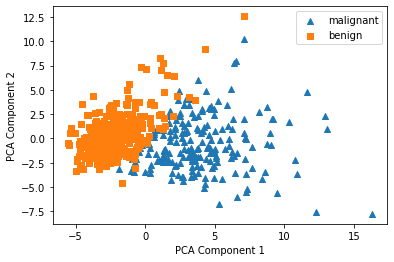

In [45]:
# bc_df_2
markers = ['^','s']

for i, marker in enumerate(markers):
    x_axis_data = bc_df_2[bc_df_2.target == i]['PC1']
    y_axis_data = bc_df_2[bc_df_2.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker= marker, label = breast_cancer.target_names[i])
    
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


## 군집화

## - 2차원 축소한 bc_pca_2 군집화

In [58]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [59]:
bc_df = pd.DataFrame (breast_cancer.data, columns= breast_cancer.feature_names)  #데이터를 데이터프레임으로 정리
bc_df['pca_x'] = bc_pca_2[:,0] #2차원 bc_pca_2
bc_df['pca_y'] = bc_pca_2[:,1] #2차원 bc_pca_2
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,pca_x,pca_y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,7.122953,10.275589
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.935302,-1.948072


In [84]:
breast_cancer.target_names #2가지['malignant', 'benign'] => n_clusters=2

array(['malignant', 'benign'], dtype='<U9')

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021) 

In [86]:
kmeans.fit(bc_std) # 정규화한 데이터를 kmeans학습
# kmeans.labels_ 

KMeans(n_clusters=2, random_state=2021)

In [81]:
bc_df['target'] = breast_cancer.target
bc_df['cluster'] = kmeans.labels_
bc_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,pca_x,pca_y,target,cluster
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,6.439315,-3.576817,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,3.793382,-3.584048,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.256179,-1.902297,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,10.374794,1.672010,0,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,-5.475243,-0.670637,1,1


In [82]:
clustering_result = bc_df.groupby(['target','cluster']).count()
clustering_result

mean radius  mean texture  mean perimeter  mean area  \
target cluster                                                         
0      0                176           176             176        176   
       1                 36            36              36         36   
1      0                 18            18              18         18   
       1                339           339             339        339   

                mean smoothness  mean compactness  mean concavity  \
target cluster                                                      
0      0                    176               176             176   
       1                     36                36              36   
1      0                     18                18              18   
       1                    339               339             339   

                mean concave points  mean symmetry  mean fractal dimension  \
target cluster                                                               
0      0                        176            176                     176   
       1                         36             36                      36   
1      0                         18             18                      18   
       1                        339            339                     339   

                ...  worst perimeter  worst area  worst smoothness  \
target cluster  ...                                                  
0      0        ...              176         176               176   
       1        ...               36          36                36   
1      0        ...               18          18                18   
       1        ...              339         339               339   

                worst compactness  worst concavity  worst concave points  \
target cluster                                                             
0      0                      176              176                   176   
       1                       36               36                    36   
1      0                       18               18                    18   
       1                      339              339                   339   

                worst symmetry  worst fractal dimension  pca_x  pca_y  
target cluster                                                         
0      0                   176                      176    176    176  
       1                    36                       36     36     36  
1      0                    18                       18     18     18  
       1                   339                      339    339    339  

[4 rows x 32 columns]

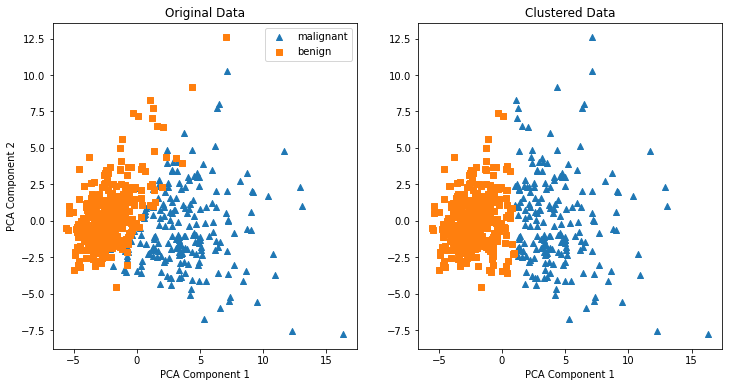

In [83]:
# 2개의 그래프 한눈에 보기
fig, axs = plt.subplots(figsize= (12,6), ncols =2, nrows= 1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = bc_df[bc_df[column] == i ]['pca_x']
        y_axis_data = bc_df[bc_df[column] == i ]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker = marker,label = breast_cancer.target_names[i])

    if k == 0: # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else: # cluster인 경우
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')